# Which YouTube videos got so trend?
### Let's analyze YouTube's trending videos. According to Google (https://support.google.com/youtube/answer/7239739?hl=en), trending videos can be determined by following considerations:
    * view count
    * temperature (how fast the video generates views)
    * the source of views (where views are coming from, including the outside of youtube)
    * the age of video (the upload date)
    * the video's performace compared to other recent videos from the same channel

### We can use this specific dataset to analyze the characteristics of trending videos:
### Data Source: https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset?select=US_youtube_trending_data.csv
### IMPORTANT: The timeline of these trending videos are from 2020 to 2024.

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

youtube_trend = pd.read_csv("US_youtube_trending_data.csv")
youtube_trend.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


Convert the 'publishedAt' and 'trending_date' to the datetime object

By using `.to_datetime()`, we can convert the time data (that are stored in string) to the datetime object. The datetime object is more flexible to handle data that are related to date and time. We use this function to our "publishedAt" and "trending_date" columns.

In [121]:
youtube_trend["publishedAt"] = pd.to_datetime(youtube_trend["publishedAt"])
youtube_trend["trending_date"] = pd.to_datetime(youtube_trend["trending_date"])
display(youtube_trend["publishedAt"].head())
display(youtube_trend["trending_date"].head())

0   2020-08-11 19:20:14+00:00
1   2020-08-11 17:00:10+00:00
2   2020-08-11 16:34:06+00:00
3   2020-08-11 16:38:55+00:00
4   2020-08-11 15:10:05+00:00
Name: publishedAt, dtype: datetime64[ns, UTC]

0   2020-08-12 00:00:00+00:00
1   2020-08-12 00:00:00+00:00
2   2020-08-12 00:00:00+00:00
3   2020-08-12 00:00:00+00:00
4   2020-08-12 00:00:00+00:00
Name: trending_date, dtype: datetime64[ns, UTC]

Since the 'trending_date' has no exact __time__ data, we can get rid of the 00:00:00+00:00. By using the `dt` accessor (provided by pandas), we call the `.date` function to use only the date.

In [122]:
youtube_trend["trending_date"] = youtube_trend["trending_date"].dt.date
youtube_trend["trending_date"]

0         2020-08-12
1         2020-08-12
2         2020-08-12
3         2020-08-12
4         2020-08-12
             ...    
268782    2024-04-15
268783    2024-04-15
268784    2024-04-15
268785    2024-04-15
268786    2024-04-15
Name: trending_date, Length: 268787, dtype: object

Which video stayed in the trending category the longest?

Lets visualize the top 10 longest remained videos in the trending category.

We can count the `video_id` columns and sort by descending order (Counting by the `video_id` column is equivalent to measuring how many days each video remained).

Then, we can use the bar plot to display the distribution of the `video_id` column because it's a qualitative (and also a nominal) variable.

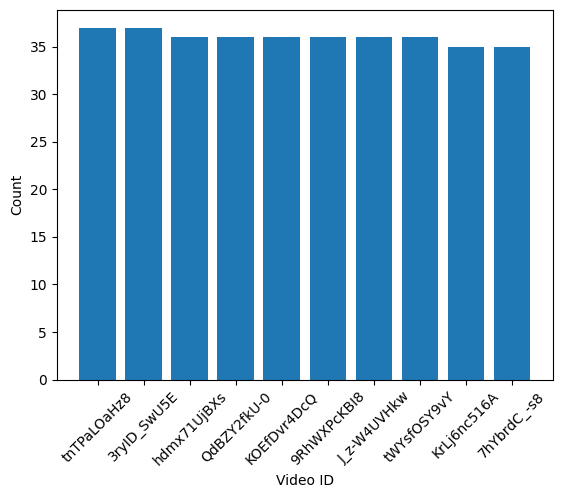

In [123]:
top_ten_videos = youtube_trend["video_id"].value_counts()[0:10]
plt.bar(top_ten_videos.index, top_ten_videos)
plt.xticks(rotation=45) # rotate labels from the x-axis to avoid overlapping labels
plt.xlabel("Video ID")
plt.ylabel("Count");

Watch the YouTube video that have remained in the trending category for 37 days!
https://www.youtube.com/watch?v=tnTPaLOaHz8

Now lets get top 5 trending videos that received the most amount of comments in that moment (the moment when video got into the trending category).

Let's group the dataset by `video_id`, aggregate the data using the `max` function on the `comment_count` column, and sort the results by `comment_count` in descending order. Then, visualize the `title`, `channelTitle`, annd `comment_count` columns.

Use `.iloc` to get the top 5 videos.

In [124]:
top_five_videos_with_most_comments = youtube_trend.groupby("video_id")[["title", "channelTitle", "comment_count"]].agg("max").sort_values(by="comment_count", ascending=False).iloc[:5, :]
top_five_videos_with_most_comments

,title,channelTitle,comment_count
video_id,,,
WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,6738537
gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,Big Hit Labels,6065230
-5q5mZbe3V8,BTS (방탄소년단) 'Life Goes On' Official MV,Big Hit Labels,4160903
gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,BLACKPINK,3534337
2L6gsn7rGqI,GAME (Full Video) Shooter Kahlon | Sidhu Moo...,5911 Records,3431431


Create a bar plot (x-axis: channelTitle, y-axis: comment_count)

<Axes: xlabel='channelTitle', ylabel='comment_count'>

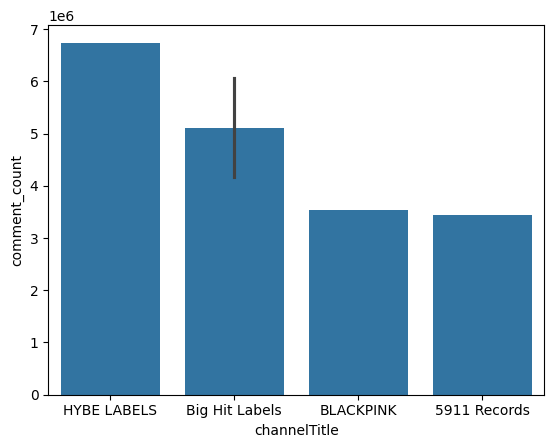

In [125]:
sns.barplot(data = top_five_videos_with_most_comments, x = 'channelTitle', y = 'comment_count')

We only got 4 bars because we have duplicate `channelTitle` values. The `.barplot` will aggregate the values and by default, it shows the mean of those two `comment_count`s. The gray colored bar is the convidence interval (CI) of the corresponding `channelTitle` values (this is a Seaborn's default behaviour)

# -----------------------still working on the rest of this cell-----------------------

In [130]:
view_count_by_trending_date = youtube_trend.groupby("trending_date")[["view_count"]].agg("max").sort_values(by="view_count", ascending=False)

What happened on April 3rd, 2024's trending videos?

In [131]:
view = view_count_by_trending_date["view_count"].iloc[0]
youtube_trend[youtube_trend["view_count"] == view] 

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
266187,cc2-4ci4G84,Discord Loot Boxes are here.,2024-04-01 17:46:17+00:00,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,24,2024-04-03,[None],1407643634,126926,0,13987,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,False,False,Why would we ever bring Loot Boxes into a chat...


This video was created by Discord and it was uploaded on April 1st (April Fool's day). According to my research, the view went up over 1.4B but YouTube adjusted the view counts because of unintended autoplay feature in Discord's app that repeatedly played the video in the background for users!

### Lets explore more!

In [132]:
tags_number = youtube_trend["tags"].str.split("|").iloc[0]
tags_number

['brawadis',
 'prank',
 'basketball',
 'skits',
 'ghost',
 'funny videos',
 'vlog',
 'vlogging',
 'NBA',
 'browadis',
 'challenges',
 'bmw i8',
 'faze rug',
 'faze rug brother',
 'mama rug and papa rug']

In [133]:
youtube_trend[youtube_trend["title"] == "Discord Loot Boxes are here."]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
265987,cc2-4ci4G84,Discord Loot Boxes are here.,2024-04-01 17:46:17+00:00,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,24,2024-04-02,[None],628718636,47460,0,4829,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,False,False,Why would we ever bring Loot Boxes into a chat...
266187,cc2-4ci4G84,Discord Loot Boxes are here.,2024-04-01 17:46:17+00:00,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,24,2024-04-03,[None],1407643634,126926,0,13987,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,False,False,Why would we ever bring Loot Boxes into a chat...
266388,cc2-4ci4G84,Discord Loot Boxes are here.,2024-04-01 17:46:17+00:00,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,24,2024-04-04,[None],1406329649,165173,0,17446,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,False,False,Why would we ever bring Loot Boxes into a chat...
266589,cc2-4ci4G84,Discord Loot Boxes are here.,2024-04-01 17:46:17+00:00,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,24,2024-04-05,[None],2791001,179531,0,18815,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,False,False,Why would we ever bring Loot Boxes into a chat...
266815,cc2-4ci4G84,Discord Loot Boxes are here.,2024-04-01 17:46:17+00:00,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,24,2024-04-06,[None],3033250,185331,0,20021,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,False,False,Why would we ever bring Loot Boxes into a chat...
267253,cc2-4ci4G84,Discord Loot Boxes are here.,2024-04-01 17:46:17+00:00,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,24,2024-04-08,[None],3230090,193160,0,20659,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,False,False,Why would we ever bring Loot Boxes into a chat...
267491,cc2-4ci4G84,Discord Loot Boxes are here.,2024-04-01 17:46:17+00:00,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,24,2024-04-09,[None],3294988,195525,0,20867,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,False,False,Why would we ever bring Loot Boxes into a chat...
267700,cc2-4ci4G84,Discord Loot Boxes are here.,2024-04-01 17:46:17+00:00,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,24,2024-04-10,[None],3344413,197057,0,20987,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,False,False,Why would we ever bring Loot Boxes into a chat...
267926,cc2-4ci4G84,Discord Loot Boxes are here.,2024-04-01 17:46:17+00:00,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,24,2024-04-11,[None],3380889,198178,0,21064,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,False,False,Why would we ever bring Loot Boxes into a chat...
268158,cc2-4ci4G84,Discord Loot Boxes are here.,2024-04-01 17:46:17+00:00,UCZ5XnGb-3t7jCkXdawN2tkA,Discord,24,2024-04-12,[None],3418280,199178,0,21167,https://i.ytimg.com/vi/cc2-4ci4G84/default.jpg,False,False,Why would we ever bring Loot Boxes into a chat...
